In [1]:
import numpy as np

from roman_shear_sims.sim import make_sim
from roman_shear_sims.catalog import SimpleGalaxyCatalog
from roman_shear_sims.psf_makers import PSFMaker


import matplotlib.pyplot as plt

In [2]:
rng = np.random.RandomState(42)

img_size = 250
band = ["Y106"]
gal_type = "exp"
psf_type = "airy"
layout_kind = "grid"
chromatic=False

n_epochs = 1
exp_time=107

avg_gal_sed_path="/Users/aguinot/Documents/roman/test_metacoadd/gal_avg_nz_sed.npy"

In [3]:
galaxy_catalog = SimpleGalaxyCatalog(
    img_size,
    rng,
    gal_type=gal_type,
    mag=20,
    layout_kind=layout_kind,
    exp_time=exp_time,
    spacing=5.,
    buffer=20,
    n_gal=50
)

psf_maker = PSFMaker(
    psf_type=psf_type,
    chromatic=chromatic
)

In [4]:
sim_dict = make_sim(
    rng,
    galaxy_catalog,
    psf_maker,
    n_epochs=n_epochs,
    exp_time=exp_time,
    cell_size_pix=img_size,
    oversamp_factor=3,
    bands=band,
    g1=0.0,
    g2=0.0,
    chromatic=chromatic,
    simple_noise=True,
    noise_sigma=1e-20,
    draw_method="fft",
    avg_gal_sed_path=avg_gal_sed_path,
    verbose=True,
)

Band loop:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch loop:   0%|          | 0/1 [00:00<?, ?it/s]

Obj loop:   0%|          | 0/25 [00:00<?, ?it/s]

/Users/aguinot/Documents/library/roman-shear-sims/roman_shear_sims/sim.py:234: RuntimeWarning: overflow encountered in divide
  np.ones_like(noise_img.array) / noise_img.array.var()


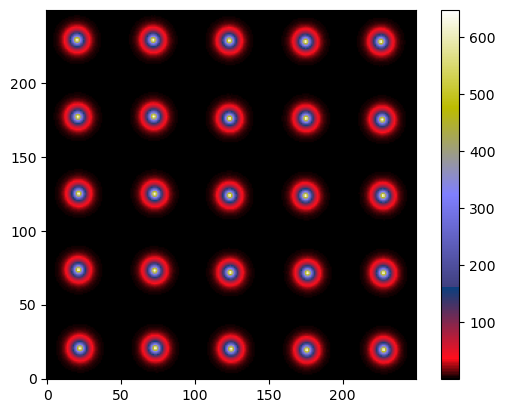

In [5]:
plt.imshow(sim_dict["Y106"][0]["sci"], origin="lower", cmap="gist_stern")
plt.colorbar()